# About the Dataset:-
#### this dataset explores the aftermath of internet response on shinzo abe's assanination, more specifically twitter dataset 

#### source: https://www.npr.org/2022/07/08/1110440504/former-japan-prime-minister-shinzo-abe-killed

# Description of dataset:-
#### Former Japanese Prime Minister Shinzo Abe, a nationalist who served in the post longer than anyone else before stepping down in 2020, was shot and killed on Friday at a campaign rally.

#### Security tackled the suspected gunman at the scene of an attack, and he was arrested by police. The shooting shocked many in Japan, which is one of the world's safest nations and has some of the strictest gun control laws anywhere.


## Insights :-

##### So , Now I Have Fully Analyzed The Dataset And Found Some Interesting Insights Here They Are :

##### 1)  37 %  Of  Rows Are Missing From Location Column , Other Than This No Column Has Missing Values
##### 2) One Thing I Noticed That Location Has Different Name But Same Value For Example" India Can Be Called Bharat Or Hindustan And Has Different Value" 

## Importing libraries for data analysis:-

In [1]:
# importing libraries :-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import squarify
from collections import Counter
import nltk
import datetime
from geosky import geo_plug
nltk.download('stopwords')

[Info] Loading Data
[Info] Loading Data completed


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hazra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# setting max row display value to 100 
pd.set_option("display.max_rows", 100)

In [3]:
geo_plug.all_State_CityNames('Goa')

'[{"Goa": ["V\\u0101sco Da G\\u0101ma", "Taleigao", "Sancoale", "Ponda", "Panaji", "Marmagao", "M\\u0101puca", "Madgaon", "Dicholi", "Curchorem", "Cuncolim", "Calangute"]}]'

## Reading the dataset 

In [4]:
# reading dataset
df = pd.read_csv("ShinzoabeCombinedTweets_20220710-102632.csv.gzip", compression="gzip")

In [5]:
# droping duplicate values from dataset
df.drop_duplicates(inplace=True)

In [6]:
# droping unimportant columns from dataset
df.drop(["Unnamed: 0","original_tweet_id","tweetid","in_reply_to_status_id","quoted_status_id"],axis=1,inplace=True)

In [7]:
df.drop("hashed_userid" ,axis=1,inplace=True)

In [8]:
# showing null values of dataset
df.isnull().sum()

masked_username        0
location           52892
following              0
followers              0
totaltweets            0
usercreateddt          0
tweetcreatedts         0
retweetcount           0
text                   0
hashtags               0
language               0
favorite_count         0
is_retweet             0
is_quote_status        0
extractedts            0
dtype: int64

In [9]:
# i'm changing the column datatype to datetime 
df["tweetcreatedts"] = pd.to_datetime(df["tweetcreatedts"])
df["extractedts"] = pd.to_datetime(df["extractedts"])
df['usercreateddt']= pd.to_datetime(df['usercreateddt'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141465 entries, 0 to 141464
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   masked_username  141465 non-null  object        
 1   location         88573 non-null   object        
 2   following        141465 non-null  int64         
 3   followers        141465 non-null  int64         
 4   totaltweets      141465 non-null  int64         
 5   usercreateddt    141465 non-null  datetime64[ns]
 6   tweetcreatedts   141465 non-null  datetime64[ns]
 7   retweetcount     141465 non-null  int64         
 8   text             141465 non-null  object        
 9   hashtags         141465 non-null  object        
 10  language         141465 non-null  object        
 11  favorite_count   141465 non-null  int64         
 12  is_retweet       141465 non-null  bool          
 13  is_quote_status  141465 non-null  bool          
 14  extractedts      141

## Analyzing And Visualizing the dataset:-


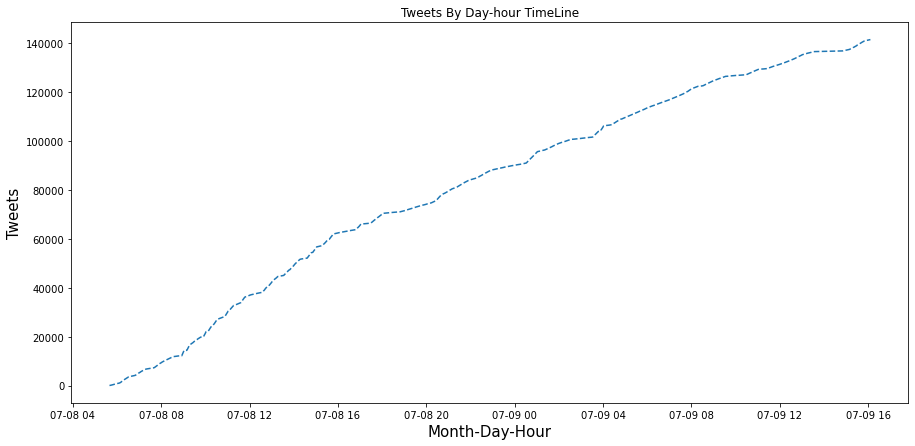

In [11]:
# this graph shows tweets progression by time, see how tweets count grows over time linearly. 
plt.figure(figsize=(15,7))
plt.plot(df["tweetcreatedts"], df.index,"--")
plt.xlabel("Month-Day-Hour",fontsize=15)
plt.ylabel("Tweets",fontsize=15)
plt.title("Tweets By Day-hour TimeLine")
plt.show()

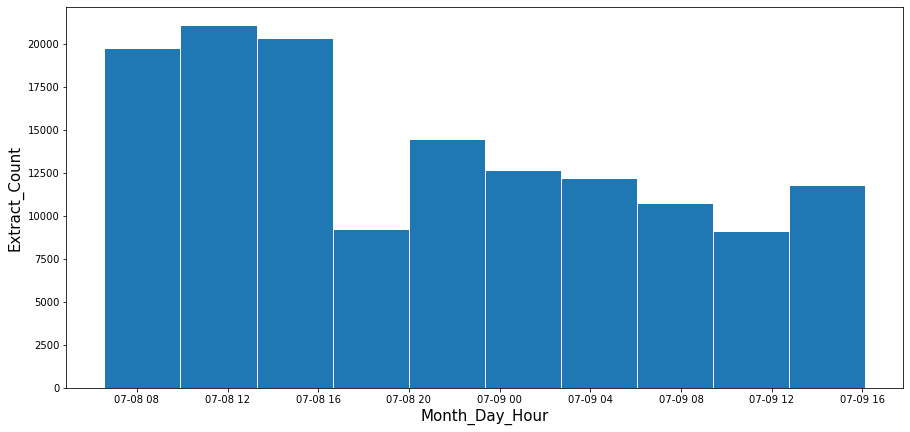

In [12]:
# plotting histogram of when the tweets data is extracted from twitter. 
plt.figure(figsize=(15,7))
plt.hist(df["extractedts"], edgecolor = "white", align="mid");
plt.xlabel("Month_Day_Hour",fontsize=15);
plt.ylabel("Extract_Count",fontsize=15);

In [13]:
# filtering the most x words from ["text"] column and then removing the stopwords from it.
# and then storing it in "x" variable 
from nltk.corpus import stopwords
stop = stopwords.words('english')
x = Counter(" ".join(df.text).lower().split()).most_common()
x = pd.DataFrame(x[:50])
x[0] = x[0].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
x = x[x[0].astype(bool)] 
x

,0,1
2,#shinzoabe,76853
8,former,33690
10,abe,29261
12,#japan,27125
14,shinzo,26063
15,prime,24826
17,minister,23461
20,pm,22137
21,japanese,20869
23,india,20628


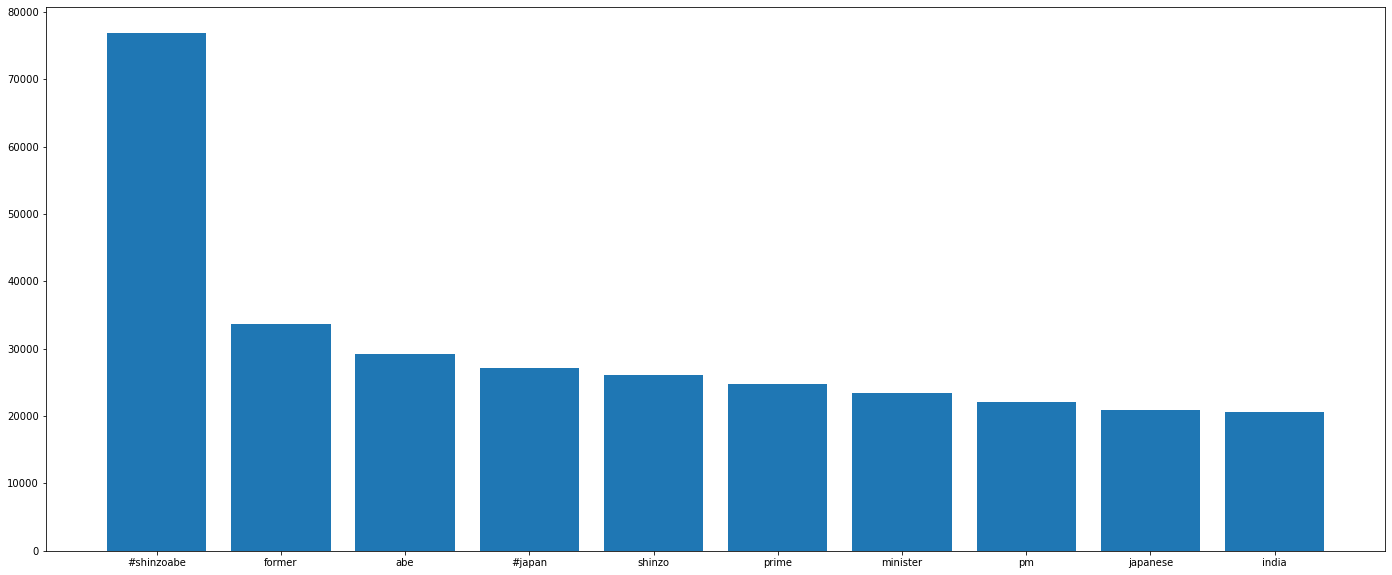

In [14]:
# plotting top 10 words most occuring words from ["text"] column on bar graph excluding stopwords.
plt.figure(figsize=(24,10))
plt.bar(x[0].iloc[0:10], x[1].iloc[0:10]);

<BarContainer object of 10 artists>

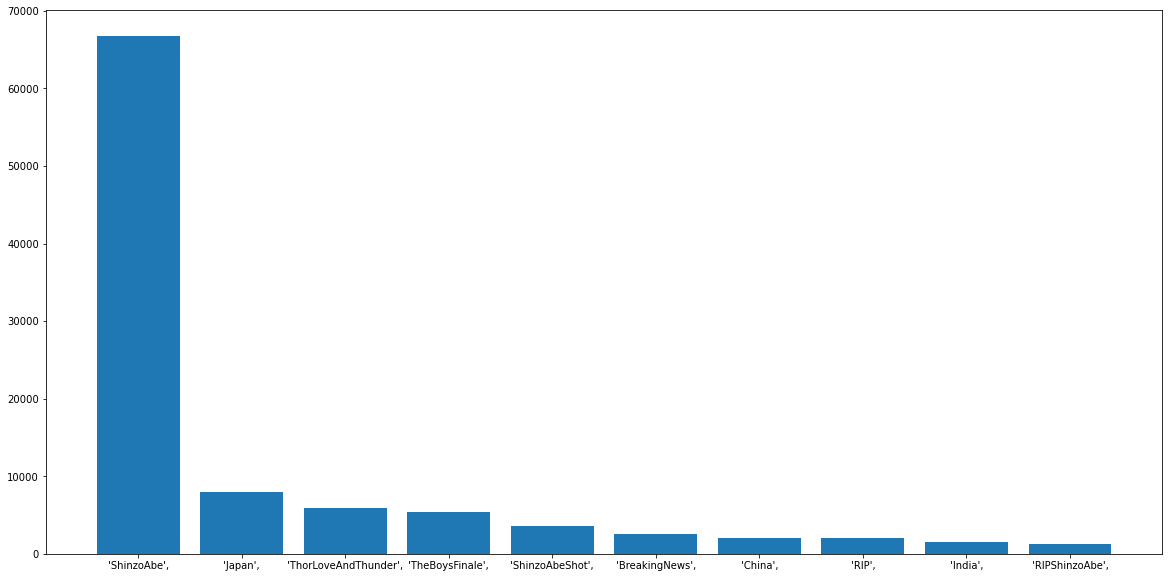

In [15]:
# plotting top 10 hashtags from ["hashtags"] column. 
common_hashtags = df["hashtags"].str.split(expand=True)
common_hashtags = common_hashtags[1]
common_hashtags = common_hashtags.value_counts().head(10)
common_hashtags = pd.DataFrame(common_hashtags)
plt.figure(figsize=(20,10))
plt.bar(common_hashtags.index,common_hashtags[1])

In [16]:
ind = df[df['location'].str.contains('Rajasthan|West Bengal|Maharastra|Pune|indiaia|indiaia|भारत|Hindiaustan|Bharat|bharat|india|Bihar|Mumbai|mumbai|New Delhi|new delhi|uttar pradesh|Kolkata|Jaipur|Agra|agra|kolkata|Banglore|Bengluru|Chennai|Hyderabad|Varanasi|Udaipur|Lucknow|Ahmedabad|Bhilai|Surat|India|india|Hindustan|hindustan|Bharat|bharat|इंडिया|हिंदुस्तान|bhaarat|बिहार|उत्तर प्रदेश|मुंबई|कोलकाता|चेन्नई|बैंगलोर|हैदराबाद|अहमदाबाद|Raipur|raipur|दिल्ली|कर्नाटक|Karnataka|karnataka|कर्नाटक|Telangana|तेलंगाना|Gujarat|गुजरात|gujarat|Tamil Nadu|tamil nadu|तमिलनाडु|पश्चिम बंगाल|Madhya Pradesh|मध्य प्रदेश|Punjab|पंजाब|नागपुर|Nagpur|Bhopal|bhopal|nagpur|Indore|indore|Visakhapatnam|Patna|patna|Vadodara|vadodara|Ghaziabad|ghaziabad|Ludhiana|Nashik|अहमदाबाद|कानपुर|Kerala|केरल|Jharkhand|झारखंड|Andhra Pradesh|andra pradesh|Uttarakhand|uttarakhand|Jammu and Kashmir|jammu and Kashmir|जम्मू और कश्मीर|Mirzapur|Pondicherry', na=False)] 
us = df[df['location'].str.contains('New Mexico|Wisconsin|Maryland|Tennessee|Nevada|Oregon|Massachusetts|El Paso|Oklahoma City|Nashville|San Jose|Jacksonville|Kansas City|Sacramento|Albuquerque|Denver|Seattle|San Francisco|Austin|San Antonio|Phoenix|San Diego|Dallas|Alaska|Michigan|North Carolina|Minnesota|Arkansas|Iowa|indiaiana|West Virgia|Idaho|Utah|New Jersey|Ohio|florida|Florida|California|United States|US|united states|America|america|CA|ca|new york|New York|Los Angeles|Chicago|chicago|Washington|Houston|houston|Miami|Texas|Pennsylvania|Philadelphia', na=False)]
ngr = df[df['location'].str.contains('nigeria|Nigeria|Lagos|Kano|Ibadan|Abuja|Oyo|abuja|Port Harcourt|katuna|Enugu|Benin City|IIlorin|Edo|Kwara|Benin City|Onitsha|Aba', na=False)] 
jpn =  df[df['location'].str.contains('Japan|japan|jpn|日本|jpn|tokyo|Yokohama|Osaka|Nagoya|osaka|nagoya|yokohama|Tokyo|Sapporo|sapporo|Kawasaki|Chiba|kawasaki|chiba|Kitakyushu|kitakyushu|東京|大阪|札幌|横浜|とうきょう|Hokkaido|北海道|kyoto|瀬戸市|京都市|Saitama|さいたま市|広島市|Toyohashi|Ichinomiya|堺市|大田区|Japan', na=False)] 
eng = df[df['location'].str.contains('Cambridge|South Hampton|South Hampshire|Yorkshire|Great Britain|Britain|England|UK|United Kingdom|London|Manchester|Essex|Winchester|Ipswich|Bristol|Dunwich|Oxford|Liverpool|Birmingham|Sheffield|Bradford|Northern Ireland|Scotland|Wales', na=False)]
ind.shape, us.shape, ngr.shape, jpn.shape, eng.shape

((28895, 15), (10313, 15), (2299, 15), (2237, 15), (2766, 15))

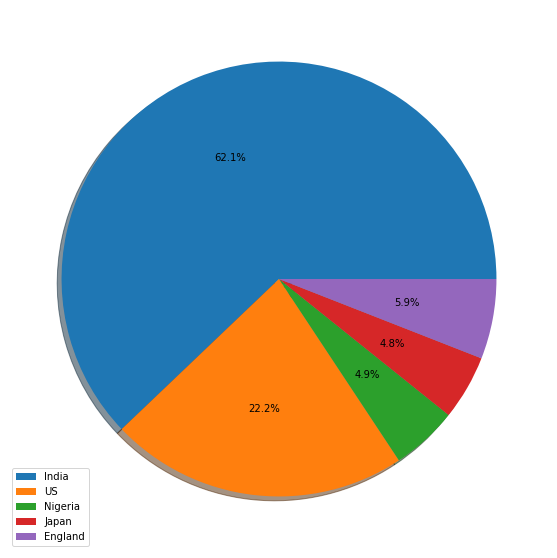

In [17]:
data = [len(ind), len(us),len(ngr),len(jpn),len(eng)]
label = ["India","US","Nigeria","Japan", "England"]
plt.figure(figsize=(20,10))
plt.pie(data, shadow=True,autopct='%1.1f%%')
plt.legend(label)
plt.show()

In [18]:
# extracting 30 most occuring location from location column from df dataset
most_common_tags = df["location"].value_counts().head(30)
most_common_tags = pd.DataFrame(most_common_tags)
most_common_tags["Country"] = most_common_tags.index
most_common_tags

,location,Country
India,5446,India
"New Delhi, India",2229,"New Delhi, India"
"Mumbai, India",1039,"Mumbai, India"
United States,930,United States
"Lagos, Nigeria",612,"Lagos, Nigeria"
USA,582,USA
भारत,555,भारत
New Delhi,533,New Delhi
Nigeria,510,Nigeria
"Bengaluru, India",509,"Bengaluru, India"


D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{

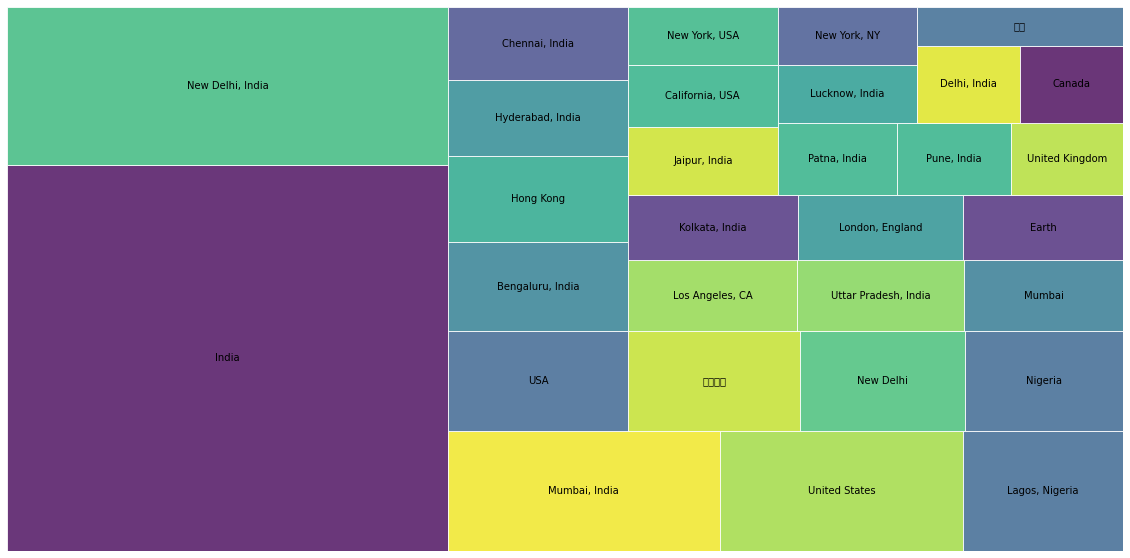

In [19]:
# plotting Most common Location tags from ["location"] column 
plt.figure(figsize=(20,10))
squarify.plot(sizes=most_common_tags['location'], label=most_common_tags['Country'], alpha=.8, edgecolor="white" )
plt.axis('off')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141465 entries, 0 to 141464
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   masked_username  141465 non-null  object        
 1   location         88573 non-null   object        
 2   following        141465 non-null  int64         
 3   followers        141465 non-null  int64         
 4   totaltweets      141465 non-null  int64         
 5   usercreateddt    141465 non-null  datetime64[ns]
 6   tweetcreatedts   141465 non-null  datetime64[ns]
 7   retweetcount     141465 non-null  int64         
 8   text             141465 non-null  object        
 9   hashtags         141465 non-null  object        
 10  language         141465 non-null  object        
 11  favorite_count   141465 non-null  int64         
 12  is_retweet       141465 non-null  bool          
 13  is_quote_status  141465 non-null  bool          
 14  extractedts      141

In [21]:
# getting unique value counts for ["is_quote_status"] and storing it in 't' variable
is_quote = df["is_quote_status"].value_counts()
is_quote = pd.DataFrame(is_quote)
is_quote["index"] = is_quote.index
is_quote.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, False to True
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   is_quote_status  2 non-null      int64 
 1   index            2 non-null      object
dtypes: int64(1), object(1)
memory usage: 48.0+ bytes


<AxesSubplot:xlabel='index', ylabel='is_quote_status'>

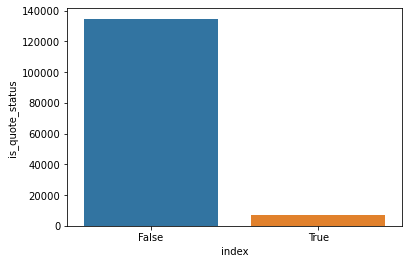

In [22]:
# plotting bar graph for ["is_quote_status"]
sns.barplot(data=is_quote, x='index',y='is_quote_status')

In [23]:
# getting unique value count for ["is_retweet"] column 
is_retweet = df["is_retweet"].value_counts()

<AxesSubplot:xlabel='is_retweet', ylabel='count'>

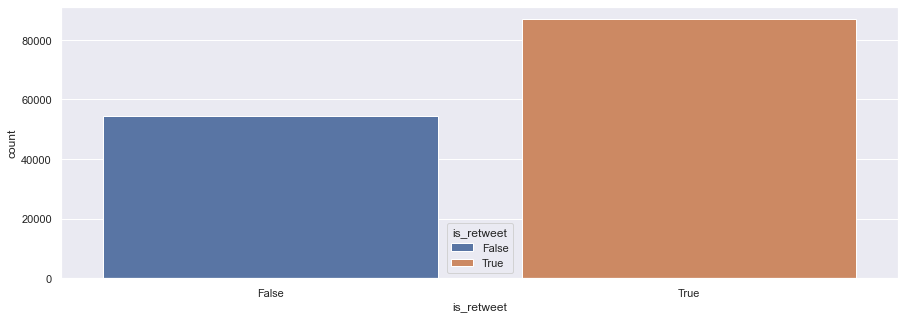

In [42]:
# plotting barplot for ["is_retweet"]
is_retweet = pd.DataFrame(df["is_retweet"])
sns.countplot(data=is_retweet,x='is_retweet', hue="is_retweet", dodge=False)

In [26]:
# fetching top 5 retweetcount 
retweet = df["retweetcount"].sort_values(ascending=False).head()
df.loc[retweet.index]

,masked_username,location,following,followers,totaltweets,usercreateddt,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,is_retweet,is_quote_status,extractedts
52157,*****eazam,Porkistan,76,114,40207,2019-01-16,2022-07-08 14:36:54,28421,Please India as a friend I tell you: stop bein...,"[{'text': 'HinduLivesMatters', 'indices': [253...",en,0,True,False,2022-07-08 14:48:55.488491
128652,*******hMishra,NaN,52,3,30,2017-03-25,2022-07-09 10:51:53,28404,Please India as a friend I tell you: stop bein...,"[{'text': 'HinduLivesMatters', 'indices': [253...",en,0,True,False,2022-07-09 11:03:22.354934
127648,********ash3940,NaN,1862,776,9446,2021-11-22,2022-07-09 10:37:08,28404,Please India as a friend I tell you: stop bein...,"[{'text': 'HinduLivesMatters', 'indices': [253...",en,0,True,False,2022-07-09 11:03:32.504510
127362,******Sweety,NaN,129,24,2538,2022-02-27,2022-07-09 10:32:53,28404,Please India as a friend I tell you: stop bein...,"[{'text': 'HinduLivesMatters', 'indices': [253...",en,0,True,False,2022-07-09 11:03:35.601494
52177,*****eazam,Porkistan,76,114,40207,2019-01-16,2022-07-08 14:36:59,19141,Hindus should be safe in India.\nIt is their c...,"[{'text': 'IsupportNupurSharma', 'indices': [1...",en,0,True,False,2022-07-08 14:48:55.235250


In [27]:
# so there's no other language than english, that's why it has 141465 unique values 
# and index has value of 141465
df["language"].value_counts()

en    141465
Name: language, dtype: int64

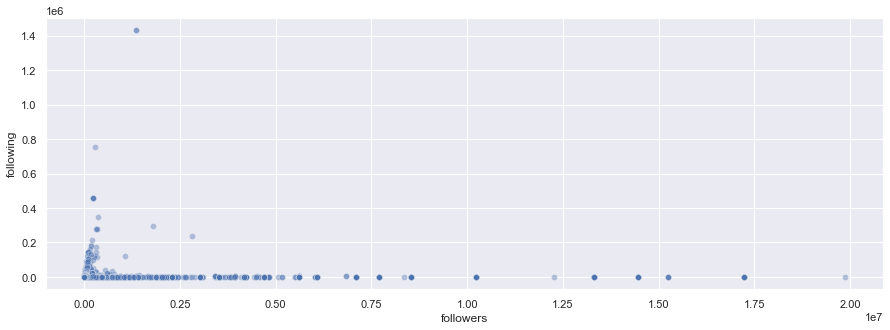

In [28]:
# plotting scatterplot for followers and following 
sns.set(rc={'figure.figsize':(15,5)})
sns.scatterplot(data=df, x="followers",y="following", alpha=0.4, marker = 'o');

In [29]:
# fetching top 5 most followers tweeter account
tp = df["followers"].sort_values(ascending=False).head()
df.loc[tp.index]
print("Mean value of followers of dataset is",df["followers"].mean())
print("Mean value of followers of dataset is",df["following"].mean())

Mean value of followers of dataset is 48012.737065705296
Mean value of followers of dataset is 1219.6281270985755


In [35]:
is_retweet

,is_retweet
0,False
1,False
2,False
3,False
4,False
...,...
141460,False
141461,False
141462,True
141463,True


## Conclusion :-

###### I'm Deeply Saddened After Assassination Of Shinzo's Death And My Condolences And Sympathies Are With Shinzo's Family May Allah Bless Him. It Took Me A While To Analyze The Dataset As It Was My First Time,  Highest Number Of Tweet Are From India, And Indians Are Very Supportive.
